ChatGPT searches for 02 modeule - [link](https://chatgpt.com/share/be3e27c5-2061-48bd-8e8d-3159249d9df4)

Other BCE resource - [link](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

Precision & Recall - [link](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

## 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as he options).

## 1. Make classification data and get it ready

In [ ]:
import sklearn
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03, # controls the amount of random perturbation added to each data point.
                    random_state = 42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label": y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


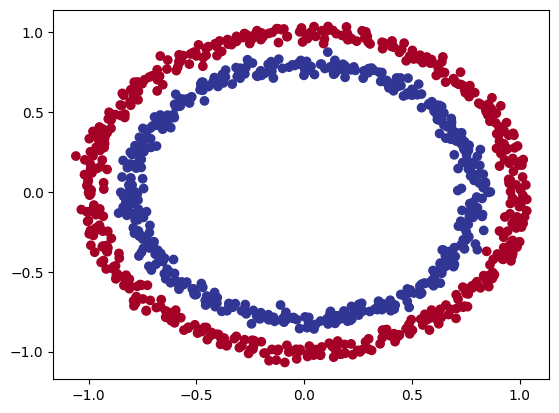

In [ ]:
# Visualize
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y, # The color of each point is determined by the corresponding value in y. Points with different labels in y will have different colors
            cmap=plt.cm.RdYlBu) # colormap to use for coloring

**Note:** The data we are working with is often reffered to as a toy dataset, a dataset that is small enough to experiment on but still sizeable enough to practice the fundamentals.

## 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first sample of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and that of y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and that of y: {y_sample.shape}") # y is a scalar, so it will not have a shape

Values for one sample of X: [0.75424625 0.23148074] and that of y: 1
Shape for one sample of X: (2,) and that of y: ()


## 1.2 Turn data into tensors and create train and test split

In [ ]:
import torch

torch.__version__

'2.4.0+cu121'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Convert array to tensor and change the dtype to tensor's default(float_32)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnoistic code so our code will run on accelerator(GPU of there is one.
2. Construct a model (by subclassing `torch.nn.Module()`.
3. Define a loss function and an optimizer.
4. Create training and testing loop.

In [ ]:
import torch
from torch import nn

# Make device agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnoistic code, let's create a model that:

1. Subclasses `nn.Module`.
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model.
4. Instantiate an instance of our model class and send it to the target device,

In [ ]:
# 2.2.1. Construct a model that sublassed nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super(). __init__()

    # 2.2.2 Create 2 nn.Linear() layer

    ## out_features of layer 1 == any no. (generally multiples of 8) == in_features of layer 2

    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features(5 gives a better chance to the neural netwrk to learn)

    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature

    # self.two_linear_layers = nn.Sequential(
    #   nn.Linear(in_features=2, out_features=5),
    #   nn.Linear(in_features=5, out_features=1)
    # )

    # 2.2.3 Define a forward function
    def forward(self, x):
      # return self.two_linear_layers(x)
      return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output


# 2.2.4 Instantiate our model
model_0 = CircleModelV0().to(device)
print(f"Model: {model_0}")


Model: CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
device

'cpu'

In [ ]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5755,  0.5929],
                      [-0.2830,  0.1874],
                      [-0.2453,  0.0575],
                      [ 0.6592,  0.3258],
                      [-0.6128,  0.2807]])),
             ('0.bias', tensor([ 0.6712,  0.1860,  0.4741,  0.6971, -0.1083])),
             ('1.weight',
              tensor([[ 0.0928, -0.3108, -0.0922,  0.3312,  0.2293]])),
             ('1.bias', tensor([-0.2830]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions: {untrained_preds[:10]}")
print(f"\n First 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions: tensor([[-0.0550],
        [ 0.0431],
        [-0.2626],
        [ 0.0036],
        [-0.1836],
        [-0.1243],
        [ 0.0895],
        [ 0.0505],
        [-0.2656],
        [ 0.0506]])

 First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

For binary classification, we prefer: **binary cross entropy**

For multiclass classification, we prefer: **categorical cross entropy(cross entropy)**.

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss requires to have gone through the sigmoid activation function prior to the input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # BCEWLogitsLoss = sigmoid activation function bult-in, more numeric stablility than BCELoss

optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train Model

Following are the steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Backpropagation
5. Optimizer step (gradient descent)

### 3.1 Goinf from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits.**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function(e.g, **sigmoid** for **binary classification** and **softmax** for **multiclass classification.**)

Then we can convert our model's prediction to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0550],
        [ 0.0431],
        [-0.2626],
        [ 0.0036],
        [-0.1836]])

In [ ]:
# Use sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4862],
        [0.5108],
        [0.4347],
        [0.5009],
        [0.4542]])

### For our prediction probability, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=1` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# Perfom above 2 steps in single shot
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equaliy
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 0., 1., 0.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calcualte loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train,
                 y_pred=y_pred)

  # 3. Optimizer zero grad
  # Clears (resets) the gradients of all the model parameters before the backpropagation step. During training, PyTorch accumulates the gradients on each call to loss.backward(). If you don’t reset them, the gradients will add up over multiple iterations (batches), which is not what you typically want.
  optimizer.zero_grad()

  # 4. Loss Backward (Backpropagation)
  loss.backward() # Performs backpropagation by computing the gradient of the loss with respect to each model parameter

  # 5. Optimizer step (gradient descent)
  optimizer.step() # Updates the model parameters using the computed gradients.(param = param - lr*gradient)

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                        y_pred=test_preds)

  # Print out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69599 | Accuracy: 47.38% | Test Loss: 0.70167 | Test Accuracy: 47.00%
Epoch: 10 | Loss: 0.69478 | Accuracy: 49.38% | Test Loss: 0.70080 | Test Accuracy: 47.00%
Epoch: 20 | Loss: 0.69435 | Accuracy: 49.88% | Test Loss: 0.70038 | Test Accuracy: 47.00%
Epoch: 30 | Loss: 0.69413 | Accuracy: 50.38% | Test Loss: 0.70006 | Test Accuracy: 46.50%
Epoch: 40 | Loss: 0.69399 | Accuracy: 50.75% | Test Loss: 0.69976 | Test Accuracy: 45.00%
Epoch: 50 | Loss: 0.69388 | Accuracy: 50.62% | Test Loss: 0.69947 | Test Accuracy: 45.00%
Epoch: 60 | Loss: 0.69379 | Accuracy: 51.00% | Test Loss: 0.69919 | Test Accuracy: 46.50%
Epoch: 70 | Loss: 0.69371 | Accuracy: 51.25% | Test Loss: 0.69893 | Test Accuracy: 47.00%
Epoch: 80 | Loss: 0.69364 | Accuracy: 51.38% | Test Loss: 0.69868 | Test Accuracy: 46.00%
Epoch: 90 | Loss: 0.69357 | Accuracy: 50.88% | Test Loss: 0.69845 | Test Accuracy: 46.00%


## 4. Make predictions and evaluation the model

It looks like our model is not learning anything. So to inspect it, lo do so, we are going to import a function `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions fom Learn PyTorch repo if it is not already downloaded
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    # Write the content of the response (which is binary data) to the file
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

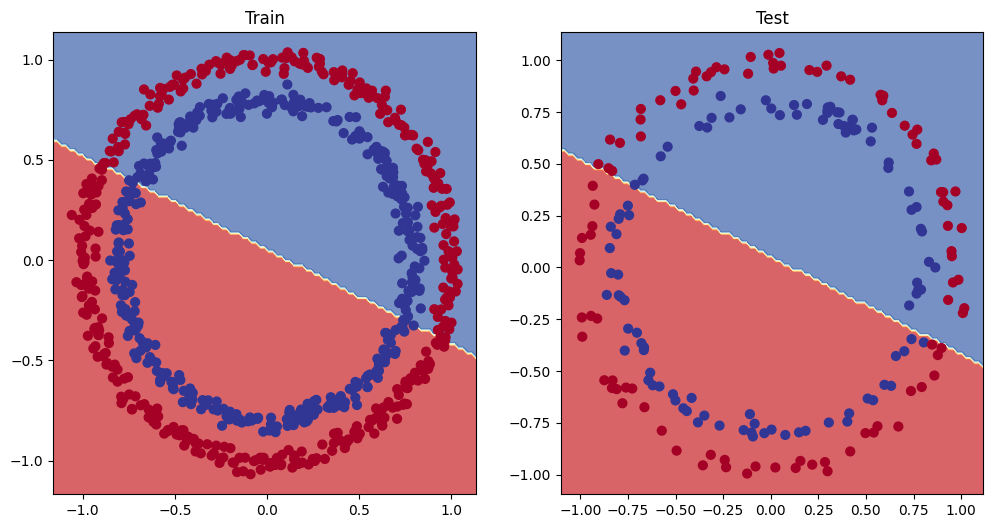

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layer - give the model  more chances to learn about the patterns in the data
* Add more hidden units - go from 5 units to 0 hidden units
* Fit for longer - increase the epoch number
* Changing the activation functions
* Change the learning rate
* Change the loss functions

These options are from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientise) can chage, they are also referref to as **hyperparameters.**

In [ ]:
# Lets try and improve our model by:
# 1. Adding more units: 5 -> 10
# 2. Increae the number of layers: 2 -> 3
# 3. Increase the number of epochs: 100 -> 1000
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x) # z is `logit`
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible BTS

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### Loss Function and Optimizer set up

In [ ]:
# Create a loss function and an optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr = .01)

### Training and Testing loop

In [ ]:
torch.cuda.manual_seed(42) if device == "cuda" else torch.manual_seed(42)

# Define the epochs
epochs = 1000

# Get the data to the correct device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

# Training Loop
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Gradient Descent
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                        y_pred=test_preds)

  # Print out what is happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.69396 | Train Accuracy: 50.88% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 100 | Train Loss: 0.69369 | Train Accuracy: 50.25% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 200 | Train Loss: 0.69351 | Train Accuracy: 50.12% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 300 | Train Loss: 0.69339 | Train Accuracy: 50.50% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 400 | Train Loss: 0.69329 | Train Accuracy: 50.38% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 500 | Train Loss: 0.69322 | Train Accuracy: 49.88% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 600 | Train Loss: 0.69317 | Train Accuracy: 49.50% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 700 | Train Loss: 0.69313 | Train Accuracy: 49.38% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 800 | Train Loss: 0.69309 | Train Accuracy: 50.00% | Test Loss: 0.69826 | Test Accuracy: 46.00%
Epoch: 900 | Train Loss: 0.69307 | Train Accuracy: 50.62% | Test Loss: 0.69

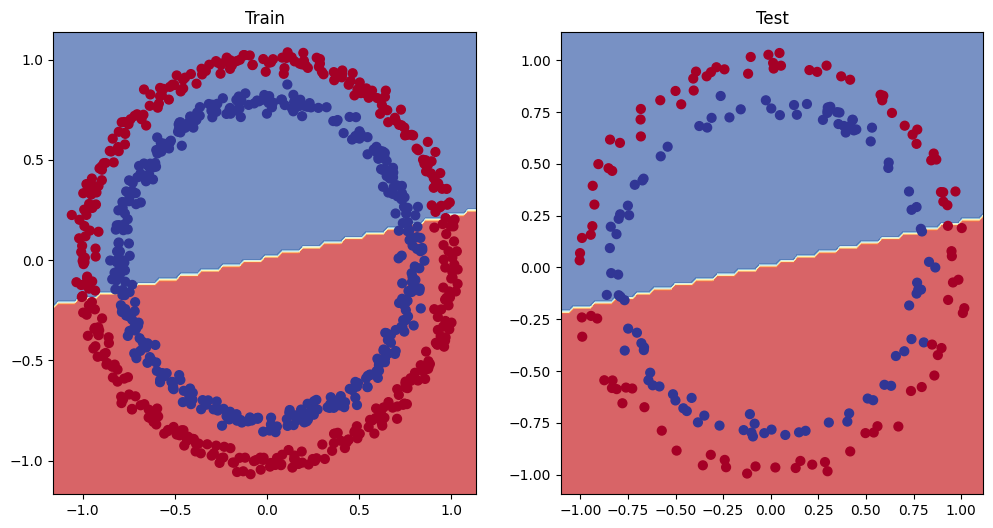

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

**Note:** Since we see that the data is non linear and the model we have created is having only linear layers, certainly, we need to add some non linear functions as well

## 6. Non-linearity

### 6.1 Recreating no-linear data(red and blue circles)

In [ ]:
# import modules
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [ ]:
# Make the data
n_samples = 1000
X, y = make_circles(n_samples,
                       noise=0.03,
                       random_state=42)
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

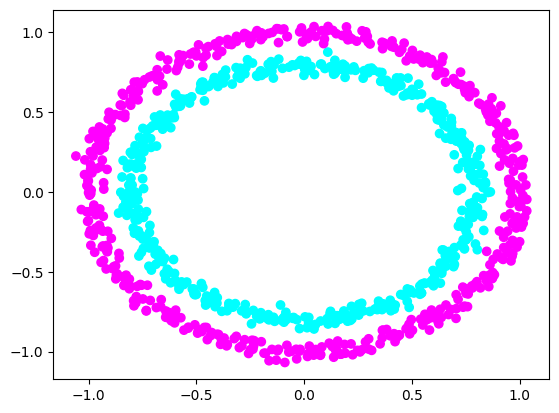

In [ ]:
# Define the colors for the classes (e.g., orange for class 0, green for class 1)
colors = np.where(y == 0, 'magenta', 'cyan')

# Plot the data with the specified colors
plt.scatter(X[:, 0], X[:, 1], c=colors)

In [ ]:
# Convert data to tensors
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

# Split into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

Artificial neural networks are a large combination of linear and non-linear functions which are capable of finding patterns in data.

In [ ]:
## Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(), lr=0.001)

In [ ]:
torch.cuda.manual_seed(42) if device == "cuda" else torch.manual_seed(42)

# Set the no. of epochs
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Gradient Descent
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Train Accuracy: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 0.6929 | Train Accuracy: 50.00 | Test Loss: 0.6933 | Test Accuracy: 50.00
Epoch: 100 | Train Loss: 0.6929 | Train Accuracy: 50.00 | Test Loss: 0.6932 | Test Accuracy: 50.00
Epoch: 200 | Train Loss: 0.6928 | Train Accuracy: 50.00 | Test Loss: 0.6931 | Test Accuracy: 50.00
Epoch: 300 | Train Loss: 0.6928 | Train Accuracy: 50.00 | Test Loss: 0.6931 | Test Accuracy: 50.00
Epoch: 400 | Train Loss: 0.6927 | Train Accuracy: 50.00 | Test Loss: 0.6930 | Test Accuracy: 50.00
Epoch: 500 | Train Loss: 0.6927 | Train Accuracy: 50.00 | Test Loss: 0.6929 | Test Accuracy: 50.00
Epoch: 600 | Train Loss: 0.6926 | Train Accuracy: 50.00 | Test Loss: 0.6929 | Test Accuracy: 50.00
Epoch: 700 | Train Loss: 0.6926 | Train Accuracy: 50.00 | Test Loss: 0.6928 | Test Accuracy: 50.00
Epoch: 800 | Train Loss: 0.6926 | Train Accuracy: 50.00 | Test Loss: 0.6927 | Test Accuracy: 50.00
Epoch: 900 | Train Loss: 0.6925 | Train Accuracy: 50.38 | Test Loss: 0.6927 | Test Accuracy: 50.00


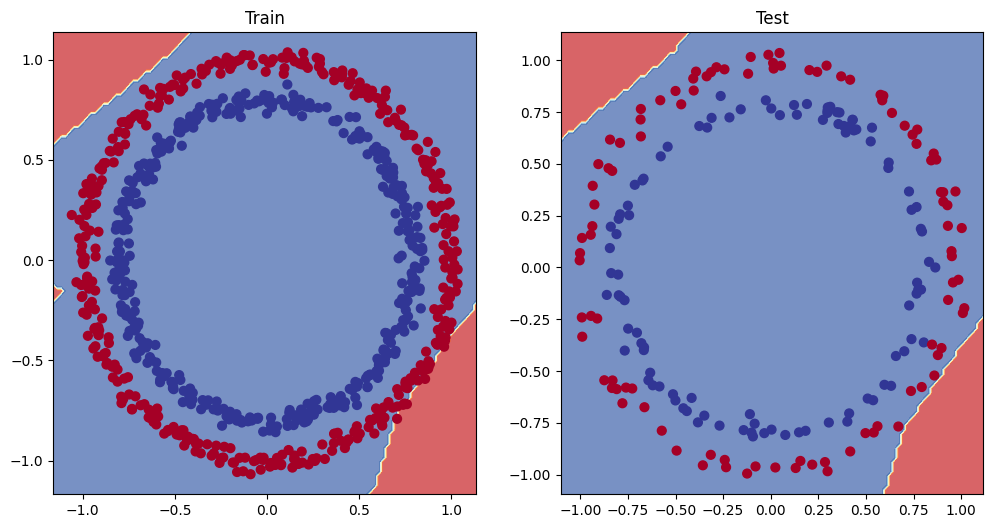

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## Putting it all together with a multi-class classificiation problem

### 8.1 Creating  toy multi-class dataset

In [ ]:
# Import all dependecies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [ ]:
# Define all the hyper parameters
RANDOM_SEED = 42
N_SAMPLES = 1000
NUM_CLASSES = 4
NUM_FEATURES = 2

In [ ]:
# Create a multi-class dataset
X, y = make_blobs(n_samples=N_SAMPLES,
                  n_features=NUM_FEATURES,
                  centers=NUM_CLASSES,
                  cluster_std=1.5, # the standard deviation of each cluster is 1.5
                  random_state=RANDOM_SEED)

X[:5], y[:5]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

In [ ]:
# Change arrays to tensors
X, y  = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).long()
# Note: torch.LongTensor -> must be integers with cross entropy loss

In [ ]:
# Split into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

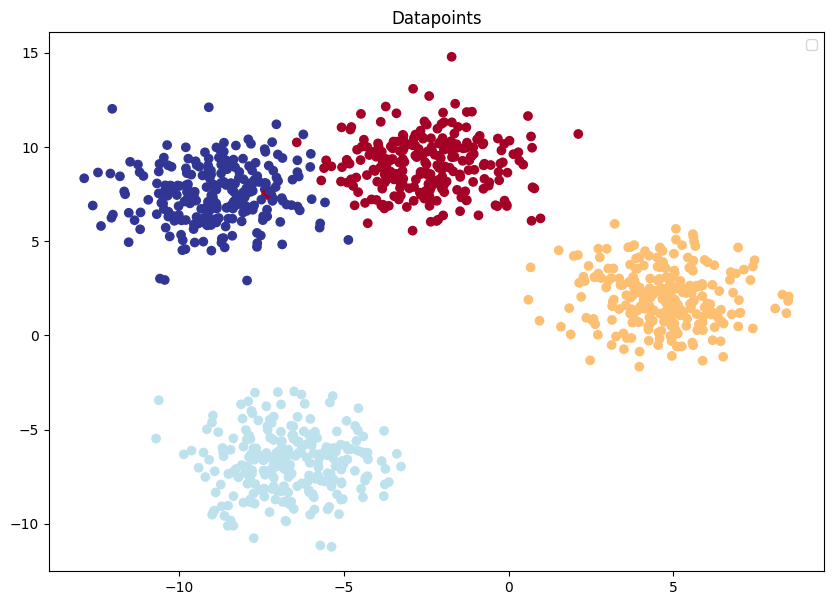

In [ ]:
# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Datapoints")
plt.legend()

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available else "gpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and optimizer for a multi-class classification model

In [ ]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

### 8.4 Train and Test loop

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
torch.cuda.manual_seed(42) if device == "cuda" else torch.manual_seed(42)

# Define the #epochs
epochs = 1000

for epoch in range(epochs):
  # Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_train).squeeze()
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Gradient Descent
  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_test).squeeze()
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Train Accuracy: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Train Loss: 1.1588 | Train Accuracy: 40.38 | Test Loss: 1.0755 | Test Accuracy: 48.00
Epoch: 100 | Train Loss: 0.0331 | Train Accuracy: 99.25 | Test Loss: 0.0243 | Test Accuracy: 99.50
Epoch: 200 | Train Loss: 0.0266 | Train Accuracy: 99.25 | Test Loss: 0.0165 | Test Accuracy: 99.50
Epoch: 300 | Train Loss: 0.0250 | Train Accuracy: 99.25 | Test Loss: 0.0144 | Test Accuracy: 99.50
Epoch: 400 | Train Loss: 0.0243 | Train Accuracy: 99.25 | Test Loss: 0.0134 | Test Accuracy: 99.50
Epoch: 500 | Train Loss: 0.0238 | Train Accuracy: 99.25 | Test Loss: 0.0127 | Test Accuracy: 99.50
Epoch: 600 | Train Loss: 0.0234 | Train Accuracy: 99.25 | Test Loss: 0.0122 | Test Accuracy: 99.50
Epoch: 700 | Train Loss: 0.0231 | Train Accuracy: 99.25 | Test Loss: 0.0118 | Test Accuracy: 99.50
Epoch: 800 | Train Loss: 0.0228 | Train Accuracy: 99.25 | Test Loss: 0.0115 | Test Accuracy: 99.50
Epoch: 900 | Train Loss: 0.0225 | Train Accuracy: 99.25 | Test Loss: 0.0112 | Test Accuracy: 99.50


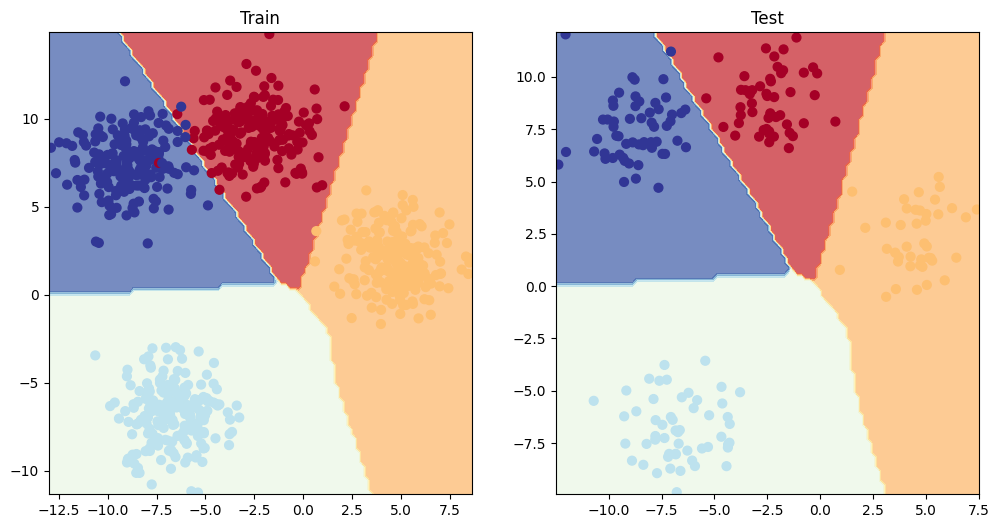

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

### 9. A few more classification metrics...(to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right? - **`torchmetrics.Accuracy()`** or **`sklearn.metrics.accuracy_score()`**
* Precision - **`torchmetrics.Precision()`** or **`sklearn.metrics.precision_score()`**
* Recall - **`torchmetrics.Recall()`** or **`sklearn.metrics.recall_score()`**
* F1-score - **`torchmetrics.F1Score()`** or **`sklearn.metrics.f1_score()`**
* Confusion matrix - **`torchmetrics.ConfusionMatrix()`**
* Classification report